In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# I used 2021 year data for this analysis.

In [2]:
baywheels01 = pd.read_csv('Baywheels/202101-baywheels-tripdata.csv')
baywheels02 = pd.read_csv('Baywheels/202102-baywheels-tripdata.csv')
baywheels03 = pd.read_csv('Baywheels/202103-baywheels-tripdata.csv')
baywheels04 = pd.read_csv('Baywheels/202104-baywheels-tripdata.csv')
baywheels05 = pd.read_csv('Baywheels/202105-baywheels-tripdata.csv')
baywheels06 = pd.read_csv('Baywheels/202106-baywheels-tripdata.csv')
baywheels07 = pd.read_csv('Baywheels/202107-baywheels-tripdata.csv')
baywheels08 = pd.read_csv('Baywheels/202108-baywheels-tripdata.csv')
baywheels09 = pd.read_csv('Baywheels/202109-baywheels-tripdata.csv')
baywheels10 = pd.read_csv('Baywheels/202110-baywheels-tripdata.csv')
baywheels11 = pd.read_csv('Baywheels/202111-baywheels-tripdata.csv')
baywheels12 = pd.read_csv('Baywheels/202112-baywheels-tripdata.csv')

In [3]:
bay_df = pd.concat([baywheels01, baywheels02, baywheels03, baywheels04, baywheels05, baywheels06, 
                       baywheels07, baywheels08, baywheels09, baywheels10, baywheels11, baywheels12], ignore_index=True)

In [4]:
bay_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,357CDE244D24405B,electric_bike,2021-01-26 11:32:59,2021-01-26 11:38:21,NaN,NaN,NaN,NaN,37.76,-122.41,37.76,-122.42,casual
1,19A3E1F4211D0EE8,electric_bike,2021-01-26 14:16:37,2021-01-26 14:19:24,NaN,NaN,NaN,NaN,37.77,-122.41,37.76,-122.41,casual
2,27004D90ADC81AFF,electric_bike,2021-01-26 14:02:37,2021-01-26 14:06:35,NaN,NaN,NaN,NaN,37.76,-122.42,37.77,-122.41,casual
3,2F81FCA3D9CD056A,electric_bike,2021-01-26 15:03:05,2021-01-26 15:07:25,NaN,NaN,NaN,NaN,37.76,-122.41,37.76,-122.42,casual
4,72CC2218DF973489,electric_bike,2021-01-26 09:04:22,2021-01-26 09:11:36,NaN,NaN,NaN,NaN,37.79,-122.41,37.78,-122.39,casual


In [5]:
bay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035163 entries, 0 to 2035162
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 201.9+ MB


In [6]:
# export the original dataframe for backup
bay_df.to_csv('Baywheels/baywheels_original.csv')

In [7]:
bay_df.duplicated().sum()

0

In [8]:
bay_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    440227
start_station_id      440226
end_station_name      486593
end_station_id        486593
start_lat                  0
start_lng                  0
end_lat                 2694
end_lng                 2694
member_casual              0
dtype: int64

In [9]:
# remove null value from dataset
bay_df = bay_df.dropna()

In [10]:
# change datatype of 'started_at' and 'ended_at' columns to datetime
bay_df['started_at'] = pd.to_datetime(bay_df['started_at'])
bay_df['ended_at'] = pd.to_datetime(bay_df['ended_at'])

In [11]:
# create duration_sec, duration_min base on started_at, ended_at columns
bay_df['duration_sec'] = (bay_df['ended_at'] - bay_df['started_at']).dt.total_seconds()
bay_df['duration_min'] = bay_df['duration_sec']/60

In [12]:
# remove records with negative duration_minutes
bay_df = bay_df[bay_df['duration_min']>=0]

In [13]:
bay_df['duration_min'].describe(percentiles=[.99])

count    1.356785e+06
mean     1.841840e+01
std      2.014903e+02
min      0.000000e+00
50%      1.073333e+01
99%      9.350000e+01
max      4.351648e+04
Name: duration_min, dtype: float64

In [14]:
# remove records with different start_date and end_date
bay_df['start_date'] = bay_df.started_at.dt.strftime('%Y-%m-%d')
bay_df['end_date'] = bay_df.ended_at.dt.strftime('%Y-%m-%d')
bay_df = bay_df[bay_df['start_date'] == bay_df['end_date']]

In [15]:
# create month, monthday, week, weekday base on started_at column
bay_df['month'] = bay_df.started_at.dt.strftime('%B')
bay_df['monthday'] = bay_df.started_at.dt.strftime('%d')
bay_df['week'] = bay_df.started_at.dt.strftime('%W')
bay_df['weekday'] = bay_df.started_at.dt.strftime('%A')

In [16]:
# re-order weekday and month
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bay_df['weekday'] = pd.Categorical(bay_df['weekday'], categories=weekdays)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bay_df['month'] = pd.Categorical(bay_df['month'], categories=months)

In [17]:
# create start_hour, end_hour base on started_at, ended_at columns
bay_df['start_hour'] = bay_df.started_at.dt.strftime('%H')
bay_df['end_hour'] = bay_df.ended_at.dt.strftime('%H')
hours = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', 
         '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
bay_df['start_hour'] = pd.Categorical(bay_df['start_hour'], categories=hours)
bay_df['end_hour'] = pd.Categorical(bay_df['end_hour'], categories=hours)

In [18]:
bay_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,duration_sec,duration_min,start_date,end_date,month,monthday,week,weekday,start_hour,end_hour
3236,ABDA3A49559A3FAE,classic_bike,2021-01-07 22:15:32,2021-01-07 22:31:47,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,...,975.0,16.250000,2021-01-07,2021-01-07,January,07,01,Thursday,22,22
6110,589DBD2D0F0902D0,classic_bike,2021-01-18 15:06:21,2021-01-18 16:39:39,Vine St at Shattuck Ave,BK-A7,Vine St at Shattuck Ave,BK-A7,37.880222,-122.269592,...,5598.0,93.300000,2021-01-18,2021-01-18,January,18,03,Monday,15,16
6232,7B7344B07AC7ACC1,classic_bike,2021-01-28 18:07:00,2021-01-28 18:16:54,Carl St at Cole St,SF-M15,Haight St at Lyon St,SF-K17-2,37.765942,-122.449228,...,594.0,9.900000,2021-01-28,2021-01-28,January,28,04,Thursday,18,18
6233,99E98580EAB8D099,electric_bike,2021-01-03 15:03:16,2021-01-03 15:14:38,Carl St at Cole St,SF-M15,Grove St at Divisadero,SF-J18,37.765924,-122.449284,...,682.0,11.366667,2021-01-03,2021-01-03,January,03,00,Sunday,15,15
6234,4A477E3D8717E550,electric_bike,2021-01-25 11:19:22,2021-01-25 11:22:40,Carl St at Cole St,SF-M15,Haight St at Lyon St,SF-K17-2,37.765948,-122.449321,...,198.0,3.300000,2021-01-25,2021-01-25,January,25,04,Monday,11,11


# 1.a Find the station id with the most ride minutes by month.

In [19]:
# find origin station with the most ride minutes
bay_df_1 = bay_df.groupby(['month','start_station_id'])['duration_min'].agg('sum').reset_index()
bay_df_1 = bay_df_1[bay_df_1['duration_min'] == bay_df_1.groupby(['month'])['duration_min'].transform('max')]
bay_df_1

,month,start_station_id,duration_min
279,January,SF-K15-,21456.850000
764,February,SF-K15-,22840.766667
1249,March,SF-K15-,27062.550000
1734,April,SF-K15-,23148.933333
2219,May,SF-K15-,33075.500000
2704,June,SF-K15-,34220.933333
3189,July,SF-K15-,32014.216667
3674,August,SF-K15-,27499.466667
4159,September,SF-K15-,27293.166667
4644,October,SF-K15-,28942.866667


# 1.b Find the origin station with the most originations (count).

In [20]:
bay_df_2 = bay_df.groupby(['start_station_id','start_station_name']).size().sort_values(ascending=False)
bay_df_2.head(5)

start_station_id  start_station_name                          
SF-J23-1          Market St at 10th St                            20948
SF-G27            Powell St BART Station (Market St at 4th St)    16150
SF-H26            Powell St BART Station (Market St at 5th St)    14790
SF-E29-2          Market St at Steuart St                         12690
SF-K15-           Fell St at Stanyan St                           12045
dtype: int64

# 1.c For each week of the year, derive the total and average ride durations for casual and members each.

In [21]:
bay_df_3 = bay_df.groupby(['week','member_casual']).agg({'duration_min': ['sum', 'mean']})
bay_df_3

duration_min           
                              sum       mean
week member_casual                          
00   casual          60016.800000  25.913990
     member          32874.016667  14.788132
01   casual         128023.850000  20.253734
     member          99846.816667  13.355647
02   casual         170445.416667  21.787731
...                           ...        ...
50   member         137208.516667  10.679368
51   casual          76064.300000  16.967276
     member          73644.433333  10.965520
52   casual          78948.816667  19.512807
     member          56678.033333  11.397151

[106 rows x 2 columns]

# 1.d What are some of the most popular trips (start station/end station pairs) that most members took?

In [22]:
bay_df_4 = bay_df.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending=False)
bay_df_4.head(5)

start_station_name                            end_station_name                            
Fell St at Stanyan St                         Fell St at Stanyan St                           1841
Buchanan St at North Point St                 Buchanan St at North Point St                   1210
Fillmore St at Jefferson St                   Fillmore St at Jefferson St                     1152
Market St at 10th St                          Powell St BART Station (Market St at 4th St)     969
Powell St BART Station (Market St at 4th St)  Powell St BART Station (Market St at 4th St)     914
dtype: int64

# 2. Baywheels_visualization.twb

In [23]:
# export the dataframe for visualization
bay_df.to_csv('Baywheels/baywheels_visualization.csv')

# 3.a Perform some statistical tests for the categories (member status, bike type).

In [24]:
bay_sub = bay_df.loc[bay_df['duration_min'] < 50]

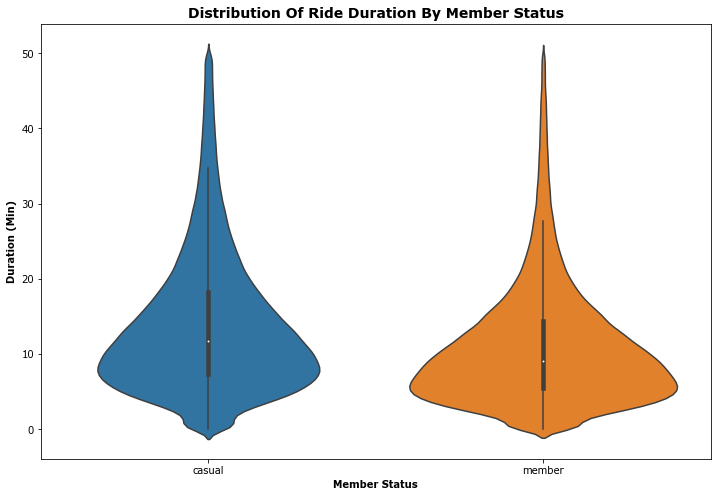

In [25]:
# average rides duration by member status
plt.figure(figsize = (12, 8))
sns.violinplot(data = bay_sub, x = 'member_casual', y = 'duration_min')
plt.title('Distribution of Ride Duration by member status'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Member Status'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Duration (min)'.title(),fontsize = 10, weight = 'bold');
plt.show()

In [26]:
# t-test of casual vs member for duration
from scipy import stats
test = stats.ttest_ind(bay_sub[bay_sub['member_casual']=='member']['duration_min'], 
                       bay_sub[bay_sub['member_casual']=='casual']['duration_min'],
                       equal_var=False)

In [27]:
print(test.statistic)
print(test.pvalue)

-193.12177092739344
0.0


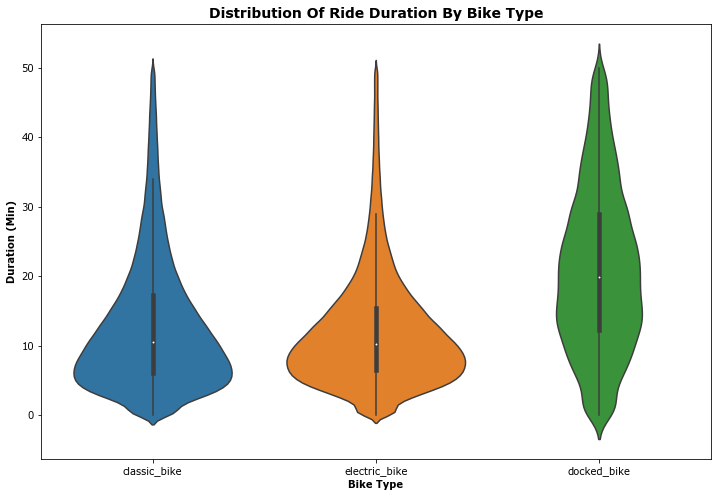

In [28]:
# rides duration by bike type
plt.figure(figsize = (12, 8))
sns.violinplot(data = bay_sub, x = 'rideable_type', y = 'duration_min')
plt.title('Distribution of Ride Duration by bike type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Bike Type'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Duration (min)'.title(),fontsize = 10, weight = 'bold');
plt.show()

# 3.b What is the distribution of categorical and discrete variables like user type, bike type?

Text(0.5, 1.0, 'Bike Rides by Member Status')

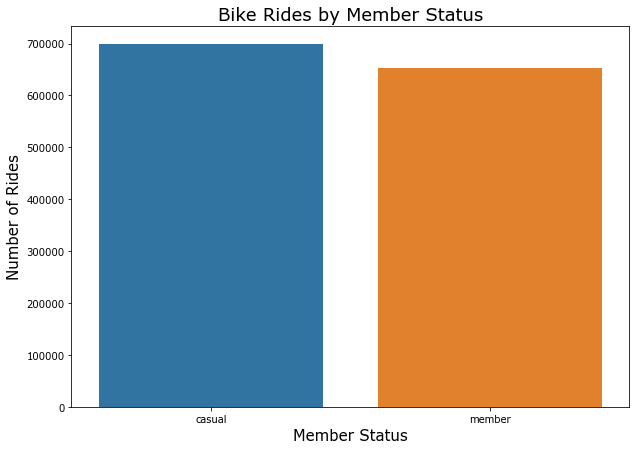

In [29]:
# bike rides by user type
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax = sns.countplot(data = bay_df, x='member_casual', ax=ax)
plt.xlabel('Member Status', fontsize=15)
plt.ylabel('Number of Rides', fontsize=15)
plt.title('Bike Rides by Member Status', fontsize=18)

Text(0.5, 1.0, 'Bike Rides by Bike Type')

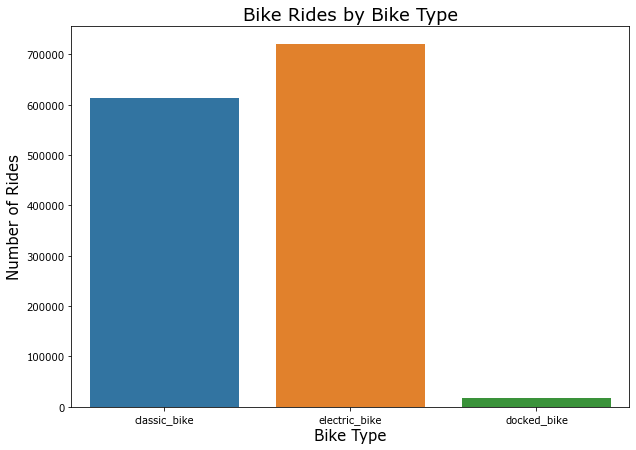

In [30]:
# bike rides by bike type
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
ax = sns.countplot(data = bay_df, x='rideable_type', ax=ax)
plt.xlabel('Bike Type', fontsize=15)
plt.ylabel('Number of Rides', fontsize=15)
plt.title('Bike Rides by Bike Type', fontsize=18)

# 3.c What is the optimal number of bikes in the system?

Text(0, 0.5, 'Number of Bikes')

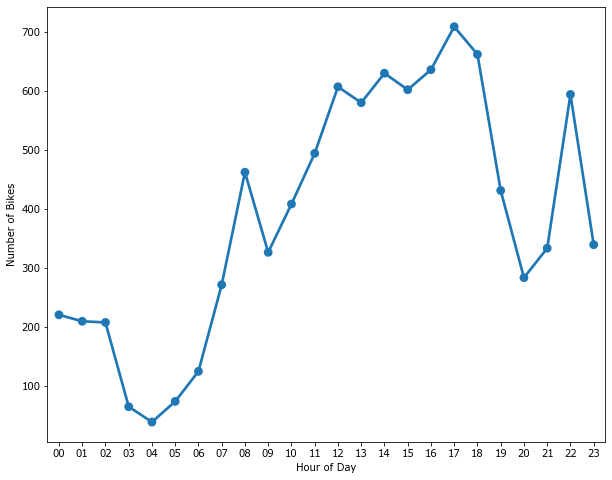

In [31]:
# maximum hourly bike rides
hour_df = bay_df.groupby(['start_date', 'start_hour'])['ride_id'].size().reset_index()
hour_df = hour_df.groupby(['start_hour'])['ride_id'].max().reset_index()
plt.figure(figsize=(10,8))
sns.pointplot(data=hour_df, x='start_hour', y='ride_id', dodge=0.3,)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bikes')

Optimal number of bikes in the system is 700.

# 3.d Any obvious patterns and correlations? (Time of ride, casual vs member)

Text(333.9272727272727, 0.5, '')

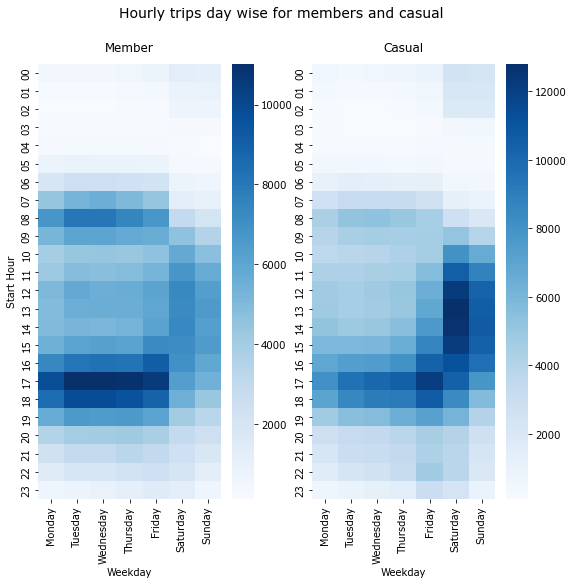

In [33]:
# heatmap for member
plt.figure(figsize=(9,8))
plt.suptitle('Hourly trips day wise for members and casual', fontsize=14)
plt.subplot(1, 2, 1)
member_df = bay_df.query('member_casual == "member"').groupby(['weekday','start_hour'])['ride_id'].size().reset_index()
member_df = member_df.pivot('start_hour', 'weekday', 'ride_id')
sns.heatmap(member_df, cmap='Blues')
plt.title('Member', y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Hour')

# heatmap for casual
plt.subplot(1, 2, 2)
casual_df = bay_df.query('member_casual == "casual"').groupby(['weekday','start_hour'])['ride_id'].size().reset_index()
casual_df = casual_df.pivot('start_hour', 'weekday', 'ride_id')
sns.heatmap(casual_df, cmap='Blues')
plt.title('Casual', y=1.015)
plt.xlabel('Weekday')
plt.ylabel('')

Casual customers use Baywheels more often on weekends and peak hours mostly around 8am, 5pm and Meembers use it on mostly on weekdays during the peak hours of 8am and 5pm.

# 3.e Histogram of time (hour) of ride start and station.

Text(0.5, 1.0, 'Bike Rides by Hour')

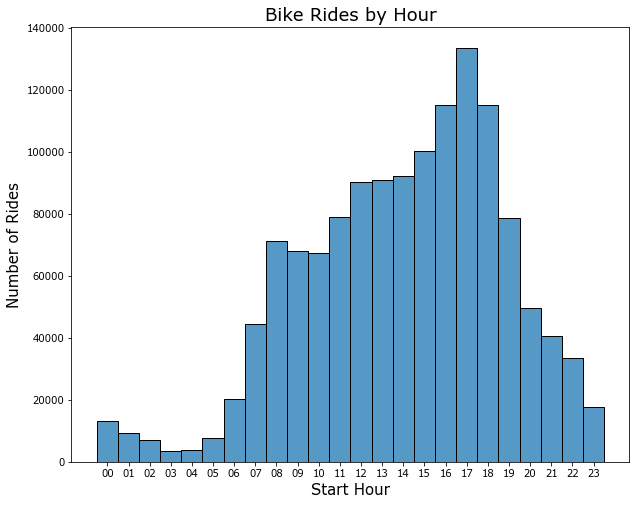

In [34]:
# histogram of time
plt.figure(figsize=(10,8))
sns.histplot(data=bay_df, x='start_hour')
plt.xlabel('Start Hour', fontsize=15)
plt.ylabel('Number of Rides', fontsize=15)
plt.title('Bike Rides by Hour', fontsize=18)

Text(0.5, 1.0, 'Bike Rides by Station')

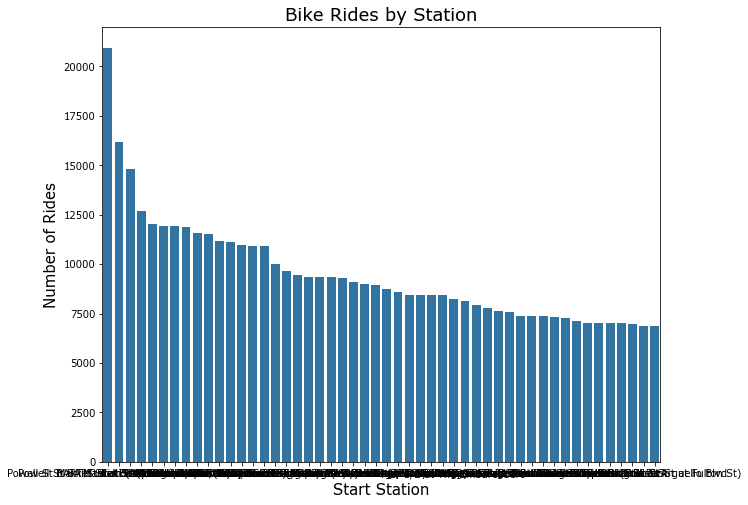

In [35]:
# histogram of top 50 station
station_df = bay_df.groupby(['start_station_name'])['ride_id'].size().reset_index().sort_values('ride_id',ascending=False).head(50)
plt.figure(figsize=(10,8))
sns.barplot(data=station_df, x='start_station_name', y='ride_id', color='tab:blue')
plt.xlabel('Start Station', fontsize=15)
plt.ylabel('Number of Rides', fontsize=15)
plt.title('Bike Rides by Station', fontsize=18)

# 3.f Distribution of minutes per ride.

Text(0.5, 1.0, 'Bike Rides by Minutes')

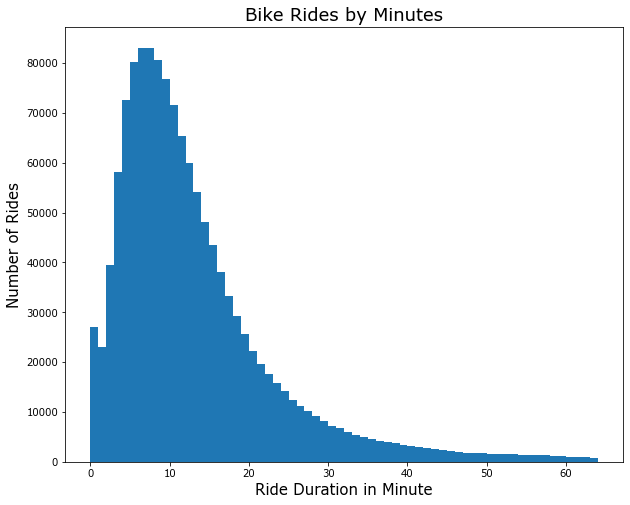

In [36]:
# plot histogram of ride duration
plt.figure(figsize=(10,8))
plt.hist(data=bay_df, x='duration_min',bins=np.arange(0, 65))
plt.xlabel('Ride Duration in Minute', fontsize=15)
plt.ylabel('Number of Rides', fontsize=15)
plt.title('Bike Rides by Minutes', fontsize=18)

# 3.g Should there be more bikes at certain stations at certain times of the day?

Text(159.0, 0.5, 'Start Hour')

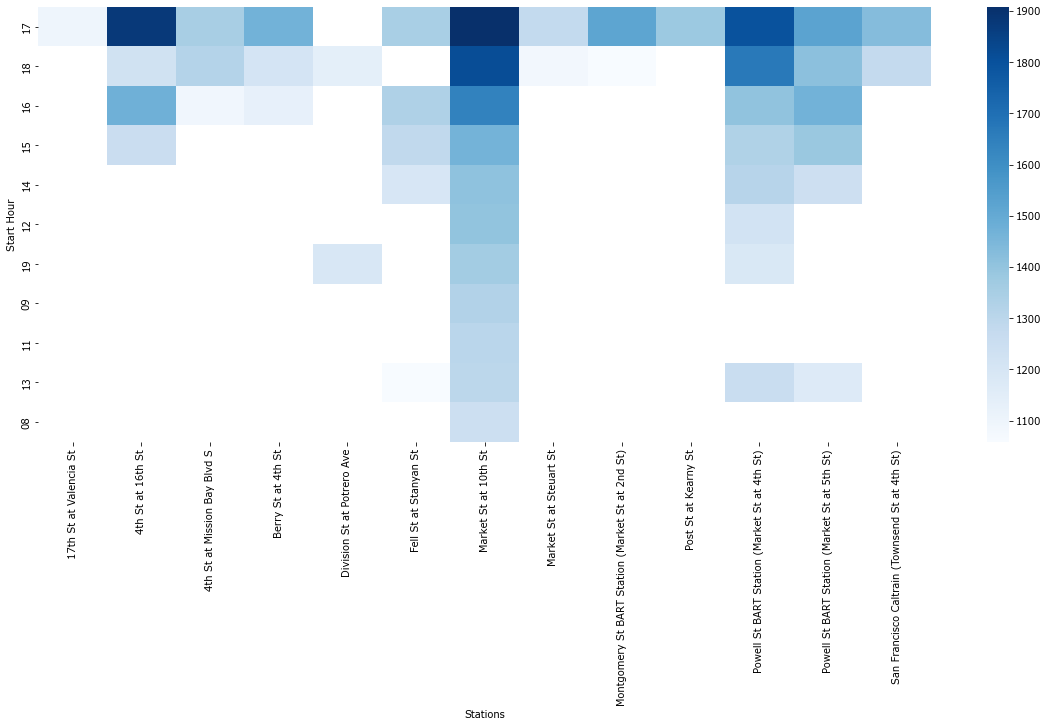

In [37]:
# heatmap for top 50 stations
plt.figure(figsize=(20,8))
station_df = bay_df.groupby(['start_station_name','start_hour'])['ride_id'].size().reset_index().sort_values('ride_id',ascending=False).head(50)
station_df = station_df.pivot('start_hour', 'start_station_name', 'ride_id')
sns.heatmap(station_df, cmap='Blues')
plt.xlabel('Stations')
plt.ylabel('Start Hour')

Some stations need more bikes at peak hours.